In [150]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii 
from astropy.io import fits
import pandas as pd
from scipy.optimize import curve_fit
import tensorflow as tf
from scipy import optimize
from scipy.stats import norm
import ast as ast
import re

In [151]:
data = np.loadtxt('Group-data.txt', dtype=[('day', 'int'), ('time', 'U5'), ('height','float')])


In [152]:
day = data['day']
time = data['time']
values = data['height']

In [153]:
def minutes(d, t_str):
    p = d *24
    h, m = map(float, t_str.split(':'))
    t = p + h
    return t * 60 + m

for entry in data:
    entry['time'] = minutes(entry['day'], entry['time'])




In [154]:
x_data = data['time']
y_data = data['height']

x_data = x_data.astype(float)

print(x_data.dtype)



float64


0.9820775035734498
4.506348276210879
0.8183440319293034
0.09248136024363983
0.01804600315890435
-23.582927716164495
-5.441989579501966


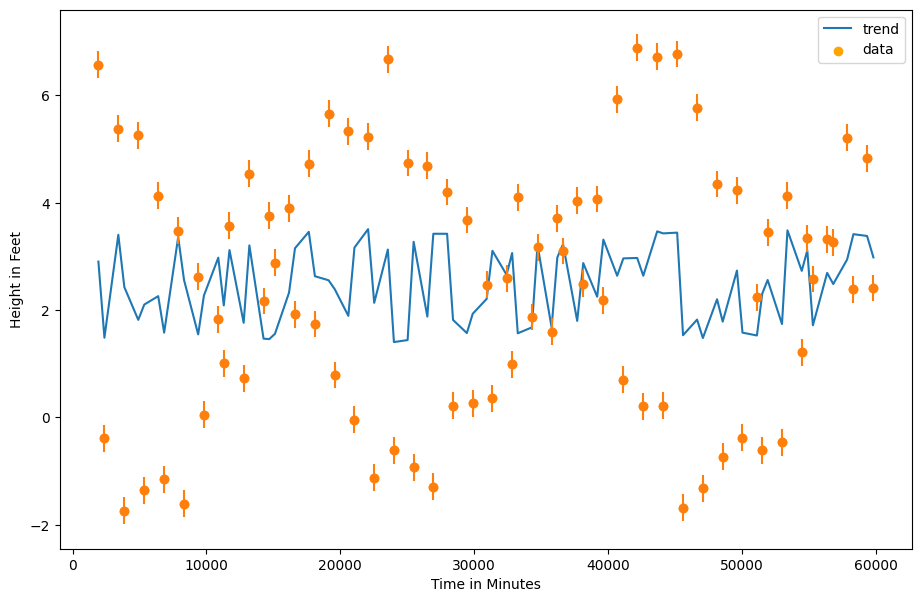

<Figure size 640x480 with 0 Axes>

In [155]:


def f_line(x,a, b, c, d, e, f, g):
    return a * (np.sin(x * b)-c) - d * (np.cos(x * e)-f) - g


init = [1.9820767860117294, 4.5063894176993958, 2.7057101941047907, 0.8605692049055762, 0.01803663692194345, 6.572363344675068, 4.4593414942689247]
sigma = np.full(len(y_data), 0.25)


popt, pcov = optimize.curve_fit(f_line, x_data, y_data, sigma = sigma, p0 = init)

af= popt[0]
bf= popt[1]
cf= popt[2]
df= popt[3]
ef= popt[4]
ff= popt[5]
gf= popt[6]



popt = af, bf, cf, df, ef, ff, gf

y_fit = f_line(x_data, *popt ) 

bt = [0, 10000, 20000, 30000, 40000, 50000, 60000]

print(af)
print(bf)
print(cf)
print(df)
print(ef)
print(ff)
print(gf)


plt.figure(figsize=(11,7))
plt.plot(x_data, y_fit, label = "trend")
y_err=0.25
plt.scatter(x_data,y_data, label='data', color='orange')
plt.xlabel('Time in Minutes')
plt.ylabel('Height in Feet')
plt.xticks(bt)
plt.errorbar(x_data,y_data, yerr = y_err, fmt='o')
plt.legend()
plt.show()
plt.savefig("fit.pdf", bbox_inches="tight", dpi= 600)




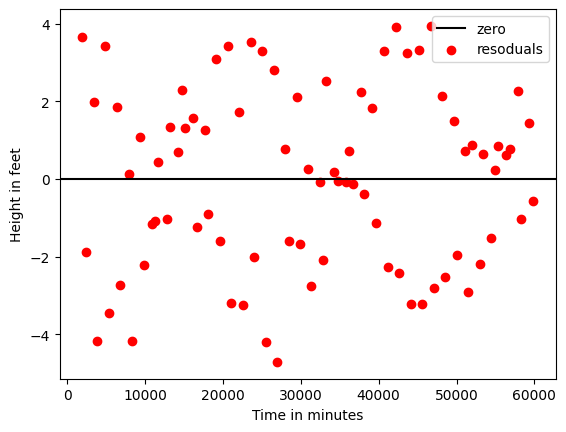

In [156]:
residuals = y_data - y_fit


plt.axhline(y=0, linestyle='-', label='zero', color='black')
plt.scatter(x_data, residuals, label='resoduals', color='red')
plt.xlabel("Time in minutes")
plt.ylabel("Height in feet")
plt.legend()

In [157]:
residual_mean = np.mean(residuals) 
residual_std = np.std(residuals)
print(f'mean residual is {residual_mean}.')
print(f'RMS residual is {residual_std}.')

mean residual is -3.202524680235013e-05.
RMS residual is 2.2788860950440974.


In [158]:
def gaussian(x, mu, s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

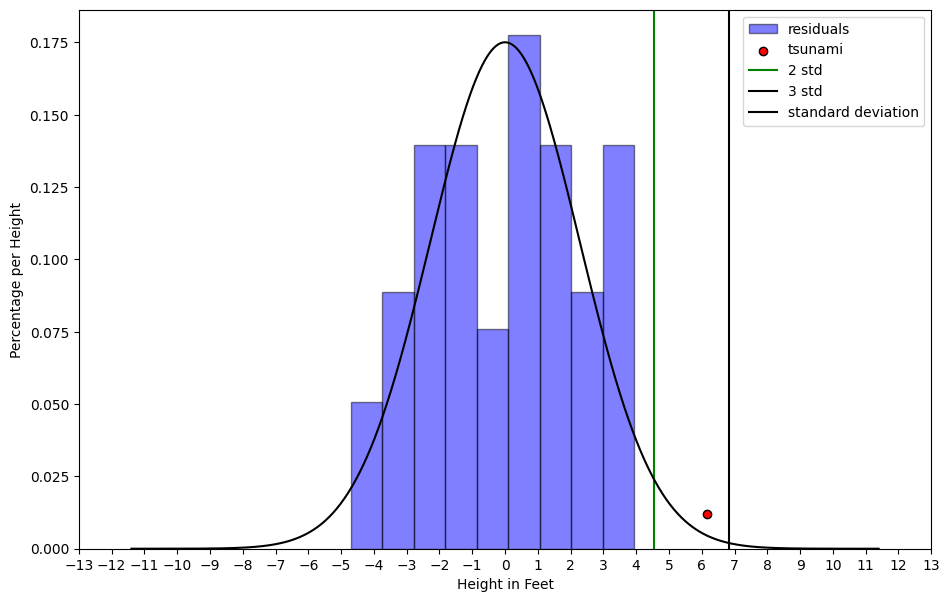

In [159]:
s = int(np.floor(np.sqrt(82)))

plt.figure(figsize=(11,7))
plt.hist(residuals, label='residuals', bins = s, alpha = 0.5, color = 'blue', edgecolor='black', density=True)
ax = plt.subplot(1,1,1)

tsn = 6.17
#d_tsn = np.concatenate([residuals, [tsn]])

plt.scatter(tsn, 0.012, color = 'red', edgecolor='black', label = 'tsunami')

plt.axvline(residual_std*2, color='green',  label= '2 std', linestyle = '-')
plt.axvline(residual_std*3, color = 'black', label= '3 std')

x_g = np.linspace(-5*residual_std, 5* residual_std, 1000)
ax.plot(x_g, gaussian(x_g,residual_mean,residual_std), color='black', label='standard deviation')
ax.set_xlim([-8,8])

plt.xlabel('Height in Feet')
plt.ylabel('Percentage per Height')
plt.xticks([-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.tick_params(axis='both', which = 'minor')
plt.legend()
plt.savefig('histogram.pdf',bbox_inches='tight', dpi=600)
plt.show()



2.2788860950440974


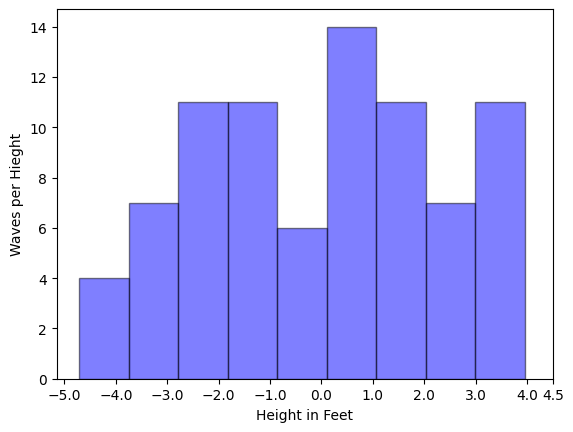

In [162]:
s = int(np.floor(np.sqrt(82)))


plt.hist(residuals, label='residuals', bins = s, alpha = 0.5, color = 'blue', edgecolor='black')
plt.xlabel('Height in Feet')
plt.ylabel('Waves per Hieght')
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,4.5])
plt.tick_params(axis='both', which = 'minor')
std = np.std(residuals)
print(std)
plt.savefig('histogram.pdf',bbox_inches='tight', dpi=600)

